# Scientific Bootcamp Day 1
### Spring 2021
https://github.com/Hekstra-Lab/scientific-python-bootcamp/tree/2021-Spring


1. How to get the most out of this bootcamp
2. Structure of bootcamp
3. Topics to come
4. Start!


## Bootcamp Outline

### Day 1

-   Basic of working in Jupyter notebooks
-   Working with arrays of data (bulk of the day is this)
-   Basic plotting
-   How to troubleshoot
-   Finish with simulating a random walk, plotting the trajectory

### Day 2
# TODO

### Day 3
# TODO
- Setting up a local python installation



## Outline

The focus of this day is to learn the basic language of scientific computing, working with numpy arrays. Building all the low-level skills that we feel are necessary for interacting with real world problems.

-   Installing python libraries



<img src="images/2d_walk.png" width="75%">


## Who we are

**Ian** G4 in Applied Physics (`ianhuntisaak@g.harvard.edu`) He/Him  
**John** G4 in Applied Physics (`johnrussell@g.harvard.edu`) He/Him  
**Jenny** G4 in Applied Physics (`jcoulter@g.harvard.edu`) She/Her  
**Noah** Software engineer at Epic Systems (`noahhuntisaak@gmail.com`) He/Him  


## Who you are

Range of pre-existing knowledge

If you have a question, someone else it too. Everyone will benefit from you asking.

# Working in Jupyter notebooks
- Tool bar on the left
- Markdown cells
    - How to make new lines
    - Writing math with $\LaTeX$: $i\hbar\frac{\partial}{\partial t}\left|\Psi(t)\right>=H\left|\Psi(t)\right>$
    - Images   
    
     <img src="images/2d_walk.png" width="40%">

- Select keyboard shortcuts
    - Indenting crtl-[ or crtl-]  
    - Shift tab
    - Cell commands 
    
    
### Useful resources:    
[Jupyterlab UI documentation (actually helpful!)](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)  
[Jupyter shortcuts and other tips](https://yoursdata.net/jupyter-lab-shortcut-and-magic-functions-tips/)  
[LATEX Math for Undergrads](http://tug.ctan.org/info/undergradmath/undergradmath.pdf)

# Basic Python Review

## Dealing with errors

This is **the** fundamental skill of writing code. 

1. Read the last line of the error
2. Look at the line the error came from
3. Copy the error description to google
    - Can help to add key terms like "matplotlib", "python", or "numpy"
  
4. Ask a friend to look at it
5. Ask a question on stackoverflow
    - Make sure you ask the question effectively! Follow these guidelines: https://stackoverflow.com/help/minimal-reproducible-example

## Examples

Taking 

### Print out the last element of L

In [32]:
L = [3, 4, 16, 23]
print(L[4])

IndexError: list index out of range

### For each value x in L print out $x^3 - 2\cdot(x-3)$

In [33]:
for x in L:
    print(x**3-2*(x-3)

SyntaxError: unexpected EOF while parsing (<ipython-input-33-d90c7192e221>, line 2)

## Googling error messages

In [4]:
print("adf"+5)

TypeError: can only concatenate str (not "int") to str

## List and number manipulation

for loops!

In [60]:
data = [3, 10, 0, 4, 8, 1]


In [61]:
# Looking at variables
print(data)

[3, 10, 0, 4, 8, 1]


In [62]:
# last thing in a cell will display
data

[3, 10, 0, 4, 8, 1]

In [63]:
# how long is data
len(data)

6

### Accessing specific points in a list

**zero indexing**

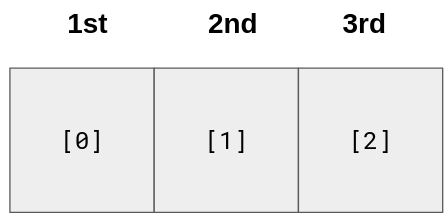

In [73]:
data[2]

0

In [75]:
# print out values in data that are greater than 5
for i in range(len(data)):
    d = data[i]
    if d > 5:
        print(d)

10
8


Negative indexing

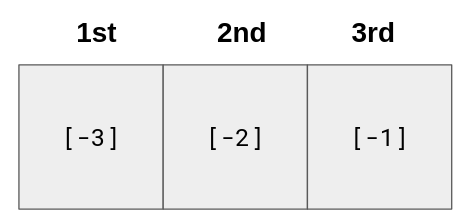

In [76]:
data[-2]

8

### Transforming values

**inplace**

In [77]:
print(data)
data[-2] = data[-2] * 5
print(data)

[3, 10, 0, 4, 8, 1]
[3, 10, 0, 4, 40, 1]


**making a new list**

In [79]:
# make a new list that has each element of data multiplied by 5.
new_list = []
for i in range(len(data)):
    new_list.append(data[i] * 5)

print(new_list)

[15, 50, 0, 20, 200, 5]


**using `print` to debug**

In [71]:
# take each element to the power of -1
new_list2 = []
for i in range(len(data)):
    new_list2.append(data[i]**-1)
# NOTE: using a print statement in a for loop to debug.

ZeroDivisionError: 0.0 cannot be raised to a negative power

## Breakout exercises 1.

1. Work together!
2. If you know to solve it help the others
3. We will go around the breakout rooms to answer questions.


#### Q1. Triangular numbers

The [triangular numbers](https://en.wikipedia.org/wiki/Triangular_number) are given by
$$a(0)=0$$
$$a(1)=1$$
$$a(n)=a(n−1)+n$$

The first 5 triangular numbers are: `[0, 1, 3, 6, 10]`

Create a list of the 1000 triangular numbers. If you get this correct then the final item in the list should be `400500`.

You can print out the final item with (`print(tri[-1])`).

In [89]:
tri = [0]
for i in range(1, 1000):
    tri.append(tri[i-1] + i)

print(tri[-1])

499500


### Q2. Sum of triangular numbers

The sum of the first N triangular numbers gives the Nth [Tetrahedral number](https://en.wikipedia.org/wiki/Tetrahedral_number).

Create an array of the first 1000 Tetrahedral numbers. If you did this correctly then the 1000th element should be `166167999`

The first 5 elements of this sequence are: `[1, 3, 7, 14, 25, 41, ...]`

Hint: You may need to use two for loops for this.

In [90]:
tetra = []
for i in range(1,1000):
    tmp = 0
    for tri_num in tri[:i]:
        tmp += tri_num
    tetra.append(tmp)
len(tetra)
    
print(tetra[-1])
    

166167000


### Numbers that are both triangular and tetrahedral.

Make a new list that contains numbers that both triangular and tetrahedral. There should be 6 matches in the first 1000 numbers.

In [93]:
same = []
for i in range(1000):
    if tri[i] in tetra:
        same.append(tri[i])
same

[0, 1, 10, 120, 1540, 7140]

### nesting lists

You can nest lists as deeply as you'd like.

In [27]:
level1 = [0, 1, 3, 4]
print(level1)

[0, 1, 3, 4]


In [95]:
two_d = [
    [0, 1, 3],
    [4, 5, 6],
    [7, 8, 9]
]
print(two_d)

[[0, 1, 3], [4, 5, 6], [7, 8, 9]]


## Indexing a 2D list of lists

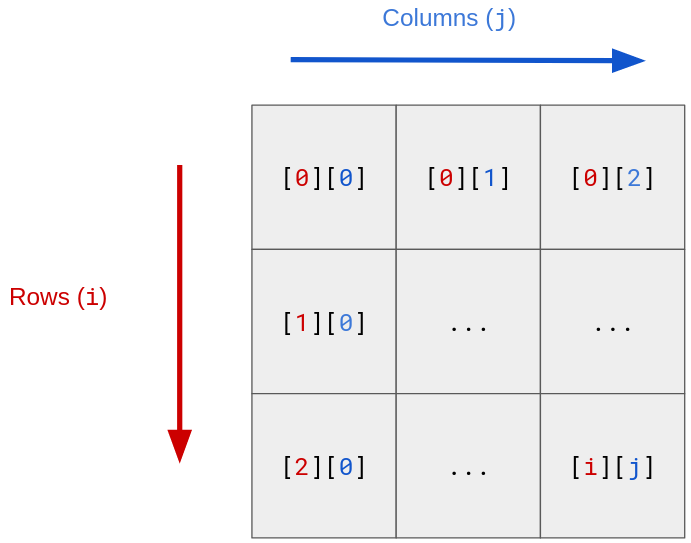

In [96]:
two_d[0][2]

3

In [97]:
two_d[1][1]

5

In [99]:
# accessing an entire row

two_d[1]

[4, 5, 6]

In [100]:
# that's just a list, so we can do anything we want to it
print(two_d)
for i in range(3):
    for j in range(3):
        two_d[i][j] = two_d[i][j] * 5
print(two_d)

[[0, 1, 3], [4, 5, 6], [7, 8, 9]]
[[0, 5, 15], [20, 25, 30], [35, 40, 45]]


In [101]:
# columns are trickier to access.
# We don't want to hard code the shape, but it's tricky to get deeper shapes.

In [103]:
# Lists can be abritrarily deep - just keep on indexing them

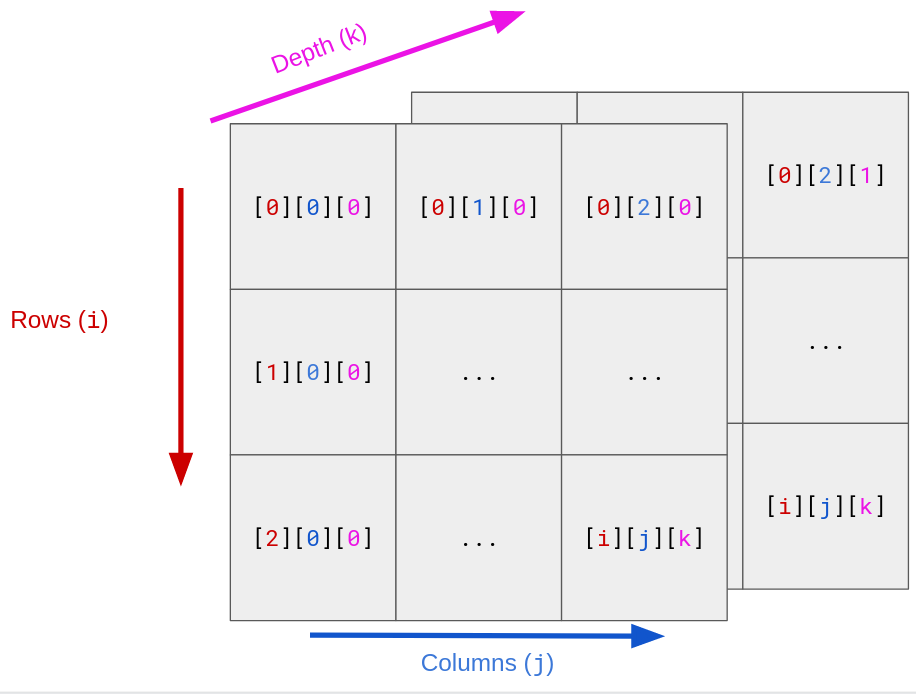

In [109]:
threeD_list = [
    [
        [1, 1, 1],
        [2, 2, 2]
    ],
    [
        [3, 3, 3],
        [4, 4, 4]
    ]
]

# This is startingt get unwieldy, because they are different length so of list. This is length 2 list, holding two lists of length 2 each that each hold two lists of length 3. 
# We will use a better tool soon!


# Breakout rooms exercise

## 1.
In the next cell we've defined a variable `room_temp` that is a 2d array. This represents the temperature distribution in a room:
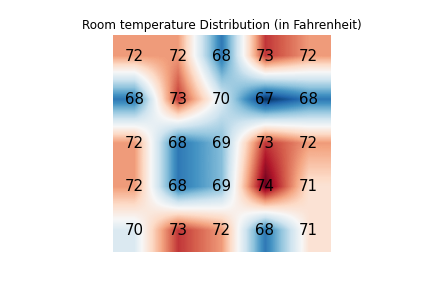

Unfortunately it's been measured in Farhenheit. So using `for` loops make a new array named `room_temp_celsius` and fill it with the values of `room_temp` but converted to celsius. The conversion formula is:
$$C = \frac{F- 32}{1.8}$$


In [110]:
room_temp = [
    [72, 72, 68, 73, 72],
    [68, 73, 70, 67, 68],
    [72, 68, 69, 73, 72],
    [72, 68, 69, 74, 71],
    [70, 73, 72, 68, 71]
]


## 2

Now assume we have some time series data of the temperature in the room.

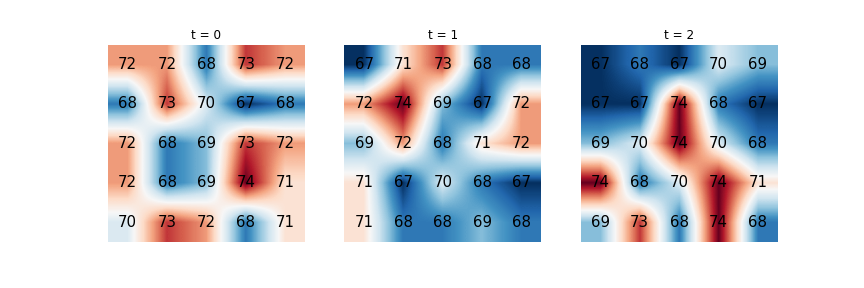

The variable `room_temp_3d` has three dimensions. Make a new array of this data converted to celsisus.

In [111]:
room_temp_3d = [
    [[72, 72, 68, 73, 72],
    [68, 73, 70, 67, 68],
    [72, 68, 69, 73, 72],
    [72, 68, 69, 74, 71],
    [70, 73, 72, 68, 71]],

    [[67, 71, 73, 68, 68],
    [72, 74, 69, 67, 72],
    [69, 72, 68, 71, 72],
    [71, 67, 70, 68, 67],
    [71, 68, 68, 69, 68]],

    [[67, 68, 67, 70, 69],
    [67, 67, 74, 68, 67],
    [69, 70, 74, 70, 68],
    [74, 68, 70, 74, 71],
    [69, 73, 68, 74, 68]]
]


## 3. Printing out nested slices

Using `for` loops and `if` statments print out the third column of the second time point of `room_temp_3d`

In [112]:
# Fundamental action of numerical computing is basically doing for loops on lists of arbitrary dimension.
# We want a really good tool to do this.

# Numpy

### What are NumPy Arrays

Highly optimized multidimensional lists. Very fast for doing math!


In [113]:
from math import sin

import numpy as np

In [114]:
N = 1000000

arr_list = list(range(N))

In [115]:
%%timeit
out = []
for i in range(len(arr_list)):
    out.append(sin(arr_list[i]))

170 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [116]:
arr_np = np.array(arr_list)

In [117]:
%%timeit
out = np.sin(arr_np)

12.1 ms ± 633 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



# How to create arrays

**From a list**: we can just call np.array(list) to turn that list into a numpy array. But be careful the lists need to be shaped like a valid matrix.


In [120]:
# turn the threeD_list into a numpy array. And look at it's shape

threeD_np = np.array(threeD_list)
print(threeD_np.shape)
threeD_np

(2, 2, 3)


array([[[1, 1, 1],
        [2, 2, 2]],

       [[3, 3, 3],
        [4, 4, 4]]])

Indexing numpy arrays.

In general this is easier and more powerful than indexing lists.

The definitive reference for this is: https://numpy.org/doc/stable/reference/arrays.indexing.html

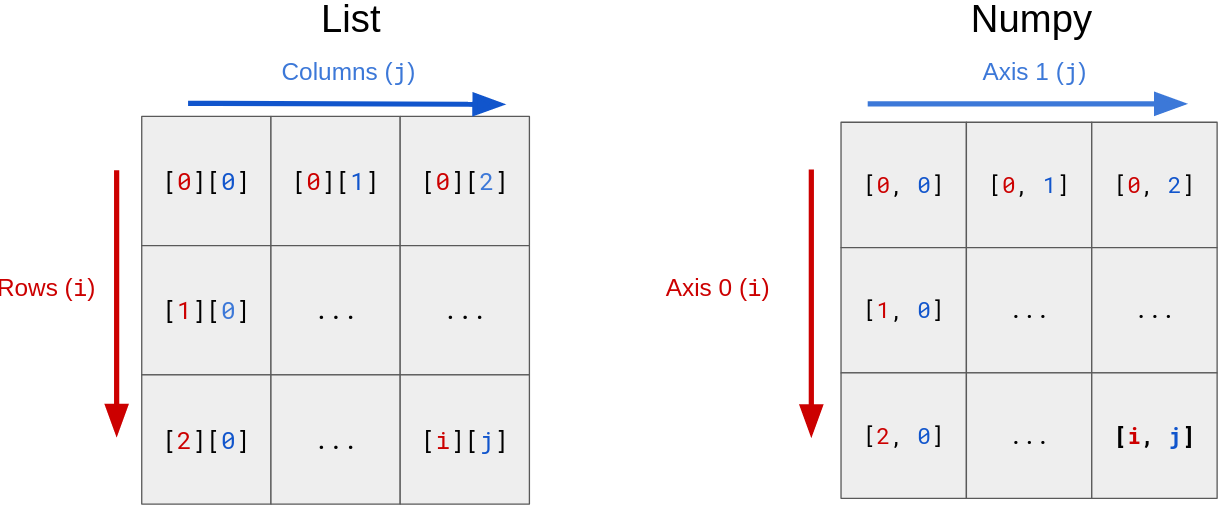


Same idea when we start adding more dimensions.


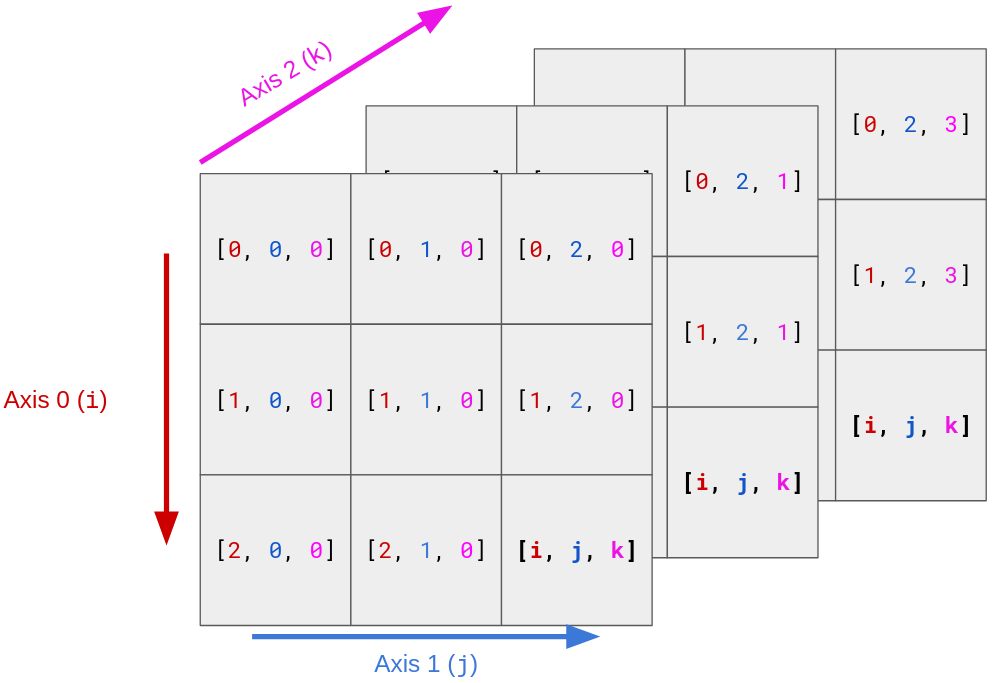




In [494]:
# shape

### Taking a whole dimension at once.

It was super annoying to get the 3 row of the second time point. So lets do it using the `:` symbol when we index.

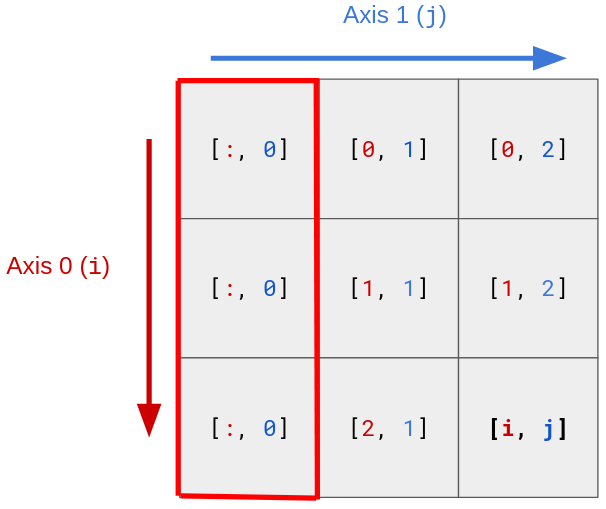

In [122]:
room_temp_3d = np.array(room_temp_3d)
room_temp_3d

array([[[72, 72, 68, 73, 72],
        [68, 73, 70, 67, 68],
        [72, 68, 69, 73, 72],
        [72, 68, 69, 74, 71],
        [70, 73, 72, 68, 71]],

       [[67, 71, 73, 68, 68],
        [72, 74, 69, 67, 72],
        [69, 72, 68, 71, 72],
        [71, 67, 70, 68, 67],
        [71, 68, 68, 69, 68]],

       [[67, 68, 67, 70, 69],
        [67, 67, 74, 68, 67],
        [69, 70, 74, 70, 68],
        [74, 68, 70, 74, 71],
        [69, 73, 68, 74, 68]]])

In [130]:
arr = room_temp_3d[1]
arr = arr[:, 2]
arr

array([73, 69, 68, 70, 68])

In [131]:
# we can even do that all at once
print(room_temp_3d[1, :, 2])

[73 69 68 70 68]


### Making a multiplied list
The old way looked like this:

```
data = [3, 10, 0, 4, 8, 1]
new_list = []
for i in range(len(data)):
    new_list.append(data[i] * 5)
```

with Numpy we can do this much more succinctly.

In [132]:
data = np.array([3, 10, 0, 4, 8, 1])
new_data = data * 5
print(new_data)

[15 50  0 20 40  5]


In [133]:
print(data)
data *= 5
data

[ 3 10  0  4  8  1]


array([15, 50,  0, 20, 40,  5])

## Doing math

There are many mathematical functions availiable to perform on arrays: https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations

For this we will use [`np.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) to generate arrays of evenly spaced numbers.


In [135]:
np.sin(data)
np.exp(data)
# NOTE: tab complete here to show finding some.

array([3.26901737e+06, 5.18470553e+21, 1.00000000e+00, 4.85165195e+08,
       2.35385267e+17, 1.48413159e+02])

In [139]:
# this extends to an arbitrary number of dimesions.

print(room_temp_3d)
print(np.round(np.sin(room_temp_3d), 2))

[[[72 72 68 73 72]
  [68 73 70 67 68]
  [72 68 69 73 72]
  [72 68 69 74 71]
  [70 73 72 68 71]]

 [[67 71 73 68 68]
  [72 74 69 67 72]
  [69 72 68 71 72]
  [71 67 70 68 67]
  [71 68 68 69 68]]

 [[67 68 67 70 69]
  [67 67 74 68 67]
  [69 70 74 70 68]
  [74 68 70 74 71]
  [69 73 68 74 68]]]
[[[ 0.25  0.25 -0.9  -0.68  0.25]
  [-0.9  -0.68  0.77 -0.86 -0.9 ]
  [ 0.25 -0.9  -0.11 -0.68  0.25]
  [ 0.25 -0.9  -0.11 -0.99  0.95]
  [ 0.77 -0.68  0.25 -0.9   0.95]]

 [[-0.86  0.95 -0.68 -0.9  -0.9 ]
  [ 0.25 -0.99 -0.11 -0.86  0.25]
  [-0.11  0.25 -0.9   0.95  0.25]
  [ 0.95 -0.86  0.77 -0.9  -0.86]
  [ 0.95 -0.9  -0.9  -0.11 -0.9 ]]

 [[-0.86 -0.9  -0.86  0.77 -0.11]
  [-0.86 -0.86 -0.99 -0.9  -0.86]
  [-0.11  0.77 -0.99  0.77 -0.9 ]
  [-0.99 -0.9   0.77 -0.99  0.95]
  [-0.11 -0.68 -0.9  -0.99 -0.9 ]]]


## Creating without copying  a list

manually typing out lists sucks. There must be a better way!!

In fact numpy provides many functions for this
- Methods giving you specific numbers
    - [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange) Use this to generate lists of integers
    - [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) use this to generate lists of evenly spaced numbers. For example to evaluate a function at many values between 0 and 1
    
- Methods where you give the shape of an array
    - [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros) give an array of zeros in the shape you specify
    - [zeros_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros_like) gives an array of zeros in the shape of anther array
    - [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones) same as zeros except filled with ones
    - [ones_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones_like) sames as zeros_like except filled with ones


#### Quick exercise. 

Take 5 minutes and try using all of these functions to see how the work.

### using numpy to write math.

$$ x^2 \text{ for } x \in [0, 1, 2, ... 9]$$

In [145]:
# a nice pattern I like is
arr = np.arange(10)
arr**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [144]:
arr * arr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

$$ f(n) = 5 \cdot n  + \frac{6}{n}$$

for $n \in [1, 1.5, 2., ..., 10]$

In [159]:
ns = np.linspace(1, 10, 19)
ns

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [160]:
5*ns + 6 / ns

array([11.        , 11.5       , 13.        , 14.9       , 17.        ,
       19.21428571, 21.5       , 23.83333333, 26.2       , 28.59090909,
       31.        , 33.42307692, 35.85714286, 38.3       , 40.75      ,
       43.20588235, 45.66666667, 48.13157895, 50.6       ])

## Breakout rooms

Triangular numbers but with Numpy!

#### Q1. Triangular numbers

The [triangular numbers](https://en.wikipedia.org/wiki/Triangular_number) are given by
$$T(0)=0$$
$$T(1)=1$$
$$T(n)=a(n−1)+n$$

However there is also an explicit formula. 
$$T_n = \frac{n(n+1)}{2}$$

Using `np.arange` to calculate the first 1000 triangular numbers.
As a reminder the first 5 triangular numbers are: `[0, 1, 3, 6, 10]` and the 1000th triangular number is`400500`.

In [175]:
tri = np.arange(1000)
tri = tri * (tri +1)/2
tri[-1]

499500.0

### Q2. Sum of triangular numbers

The sum of the first N triangular numbers gives the Nth [Tetrahedral number](https://en.wikipedia.org/wiki/Tetrahedral_number).

Using the numpy function [cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) (`np.cumsum`) which stands for cumulative sum calculate the tetrahedral numbers.
As a reminder the first 5 elements of this sequence are `[1, 3, 7, 14, 25,  ...]` and the 1000th element is `166167999`

# TODO - cumsum has this horrible off by one indexing issue and gives the wrong answer

In [176]:
tetra = np.cumsum(tri[1:])
# print(tetra)
tetra[-1]

166666500.0

### Q3. Finding the intersection of triangular and tetrahedral numbers

Using numpy figure out which triangular numbers are also tetrahedral numbers. This is a little bit more complicated than can be accomplished with pure indexing, so our first thought should be to ask if Numpy has a function to do this. In this case the answer to that question is yes, and this the function we want is `np.intersect1d`.

In general your first step should always be to google: `How to do I ___ in numpy?` and 9 times out of ten you'll find an answer with the first link.

Tip: If you don't like the way the arrays are printing out, turn them into integers by calling:

`print(arr.astype(int))` instead of just `print(arr)`

In [195]:
print(np.intersect1d(tri, tetra).astype(int))

[   1   10  120 1540 7140]


## More indexing 

# TODO figure out where ranges and multidim selections go???


####  Selecting ranges of elements

#### Multidimensional selections

### Indexing using arrays

In [182]:
# not limited to indexing with single numbers or ranges of numbers. We can also select multiple specific points

arr = np.linspace(0, 100)
arr

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [184]:
idx = [0, 40, 44]
arr[idx]

array([ 0.        , 81.63265306, 89.79591837])

In [185]:
# this is an easy way to get an error you'll see alot

arr[[0, 40, 70]]

IndexError: index 70 is out of bounds for axis 0 with size 50

In [186]:
# doesn't have to be in any particular order!!
arr[[40, 45, 1]]

array([81.63265306, 91.83673469,  2.04081633])

In [190]:
unsorted_array = np.array([4, 0, 1, 3, 2])
unsorted_array[[1, 2, -1, -2, 0]]
# if you can an array that tells you the indices that would sort the array. then you can sort the array!

array([0, 1, 2, 3, 4])

# Super basic plotting TODO - update these links to be better


https://matplotlib.org/3.3.4/tutorials/index.html  
Matplotlib documentation is often opaque, the best resources are generally found by googling: "how do I plot ___ in python" and finding a good stackoverflow answer   
https://github.com/matplotlib/cheatsheets
Specifying colors: https://matplotlib.org/tutorials/colors/colors.html  
Good reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html


In [202]:
import matplotlib.pyplot as plt

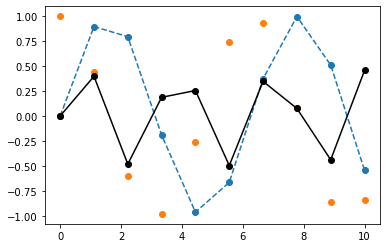

In [215]:
x = np.linspace(0, 10, num=10)
x2 = np.linspace(0, 10, num=10)

plt.plot(x, np.sin(x), 'o--')
plt.plot(x2, np.cos(x2), 'o')

multiplied = np.sin(x) * np.cos(x2)
plt.plot(x, multiplied, 'o-', color='black')

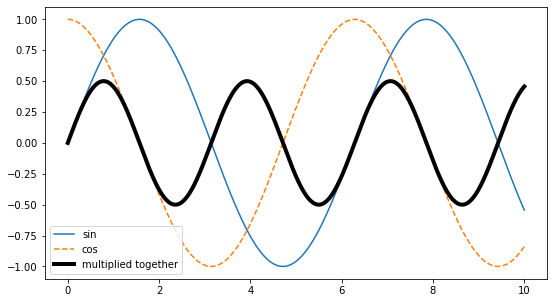

In [223]:
plt.figure(figsize=(9,5))
x = np.linspace(0, 10, 1000)
x2 = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x), label='sin')
plt.plot(x2, np.cos(x2), '--', label='cos')

multiplied = np.sin(x) * np.cos(x2)
plt.plot(x2, multiplied, label='multiplied together', color='black', linewidth=4)
plt.legend()


# Breakout rooms

Using indexing and plotting together

#### Sorting two arrays in parallel

In the below cell we've given some data to plot that is not sorted! So when we draw a line through the points it becomes a spaghettified mess. Use what we know about sorting arrays using other arrays to fix this. `np.argsort` is a great function to use to figure out the order the data should be sorted in.


Once correctly sorted the plot will look like this:

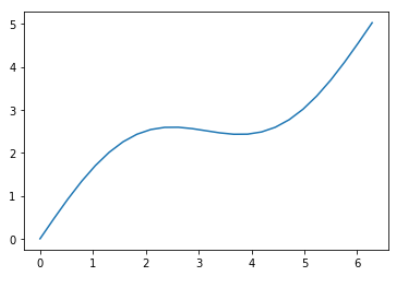


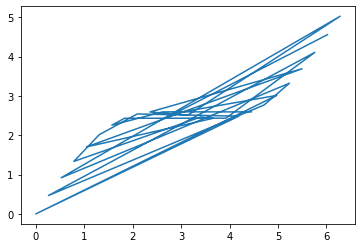

In [253]:
x = np.array([6.02138592, 2.87979327, 4.97418837, 0.        , 4.1887902 ,
       2.0943951 , 1.30899694, 0.78539816, 3.40339204, 3.66519143,
       1.04719755, 5.49778714, 2.35619449, 3.14159265, 6.28318531,
       0.52359878, 5.23598776, 4.71238898, 0.26179939, 5.75958653,
       3.92699082, 1.83259571, 1.57079633, 2.61799388, 4.45058959])
y = np.array([4.55828969, 2.56265366, 3.01342487, 0.        , 2.48500676,
       2.54154149, 2.01312338, 1.33542531, 2.46389459, 2.43215314,
       1.70378344, 3.69112293, 2.59206237, 2.51327412, 5.02654825,
       0.91887902, 3.3227648 , 2.76991118, 0.46825856, 4.10766923,
       2.43448587, 2.4320024 , 2.25663706, 2.5943951 , 2.59454585])

fig, ax = plt.subplots()
plt.plot(x,y)

#### Q2: 

In the below cell there is code that makes a a line plot. Draw attention to the 6th, 18th, and 45th points by also plotting them as red dots. In order to do this you will need either need to call `plt.plot` a second time, or use `plt.scatter`. You will also need to use the `color` argument to `plt.plot`.

You should end up with an image that looks like this (Though the subsampled points may be different):

<img src='images/indexing_subsample.png' width=40%>

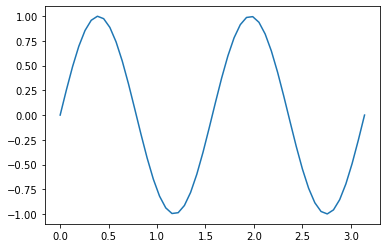

In [254]:
x = np.linspace(0, np.pi)
y = np.sin(x * 4)
plt.plot(x, y)

### 2.
Plot  $ y(t) = e^{-at}$ for $t \in [0,1]$ for these values of $a$: [1, 5, 10]

Hint: Use `np.linspace` and `np.exp` to do this.
Hint 2: Call `plt.plot` multiple times

You can also use functions like `plt.ylabel` and `plt.xlaebl` to set the x and y labels like in this image:

<img src='images/math_2.png' width=40%>

## Final Exercise

This one is harder. Don't wrk if you don't finsih it before we call you back.

Find the lowest point of 
$$y = \sin(x) - \cos(5\cdot log_2(x))$$ 
between $x=1$ and $x=40$. Then using`plt.axhline` and `plt.axvline` produce this plot:

<img src='images/indexing_func_min.png' width=40%>

Look at the functions: `np.argmin`, `np.argmax` and `np.argsort`

## Thanks for attending day!

We'll come back to the main zoom room soon. In the meantime please fill out this super brief anonymous google form. This is to help us set the pace for the next two days and to improve this bootcamp in the future. https://forms.gle/cszAXP3c1QC3S1Ve8

If you feel comfortable emailing John and Ian with specific feedback that's also totally welcome.